# Multi-Class Classification

The easiest case to train a classification model appears when we have to
predict between two classes and we have seen examples using Logistic
Regression, Perceptrons or SVMs.  Some of the classical classifiers do not
natively support the ability to be trained for multiple classes
simultaneously.

A common way to extend binary classifiers to multiple classes is to divide
the full dataset to multiple binary classification datasets and for each of
them build a separate model and to do so there are two ways to build 
the necessary classifiers: **One vs rest** and **One vs One**

In real world the **One vs Rest** (also known as **One vs All** is the most
commonly used approach by a far.

https://www.sciencedirect.com/science/article/pii/S0031320320303319




## One vs One
One vs One we train a classifier for each pair of classes.

Having N classes we will need to train $\Large \frac {N \cdot (N-1)} {2}$ classifiers.

Given the number of necessary classifiers the One vs One method becomes realively
slow to train and it might become usefull in the case of unbalanced datasets.

In this context we will not work with **One vs One** instead we wil concentrate to
the **One vs rest** approach which is also very widely used in the whole industry.



## One vs All
One vs all will train one classifier per class, meaning that in total we will need to train N classifiers.

An example of this classifier we have already seen in the iris data set which had data samples for three different spicies of the same flower:

- Setosa
- Virginica
- Versicolor

in this case the model will be trained to make the followning 3 decissions:

1. Is Setosa ? YES
2. Is Virginica? NO
3. Is Versicolor? NO

which graphically can be represented with with following picture:



<img src="./images/one-to-many-classifier.png" style="height:200px"/>


### A simple example of one vs all classifier

As an example lets consider the following data points that belongs to 
three different classes: Red, Blue and Green:

<img src="./images/mc-1.png" style="height:200px"/>

The first step will be to separate only the Red dots while not considering
the colors of the rest as we can see in the following picture:

<img src="./images/mc-2.png" style="height:200px"/>

Continuting the same process with the Blue points we complete our classification
processing as can be seen here:

<img src="./images/mc-3.png" style="height:200px"/>






In [60]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

# Scikit's implementation of OneVsRestClassifier

Since multi-classifiers are very common when we have to deal with 
classification data sklern provides a very versatile out of the 
box implementation that should be used whenever needed.

Here we read more about it.
https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

An example of how to use it follows:

In [61]:
df = pd.read_csv("./data/clustered-data-3.csv")
y = np.array([1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 2, 0, 0])
display(df)

,X1,X2
0,8.4816,-0.8505
1,8.3185,-2.2823
2,9.6458,-1.0299
3,-1.1538,3.5066
4,10.9228,1.2229
5,-3.3315,2.8585
6,-3.5532,3.9819
7,6.9927,-0.9538
8,2.6459,-0.3883
9,2.5408,-2.8900


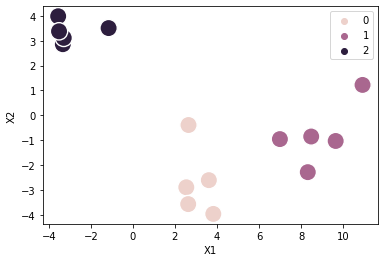

In [62]:
clf = OneVsRestClassifier(SVC()).fit(df, y)
_ = sns.scatterplot(x = df["X1"], y = df["X2"], s=300, hue=y)


In [63]:
print(clf.estimators_)
print(clf.n_classes_)
print(clf.n_features_in_)

[SVC(), SVC(), SVC()]
3
2


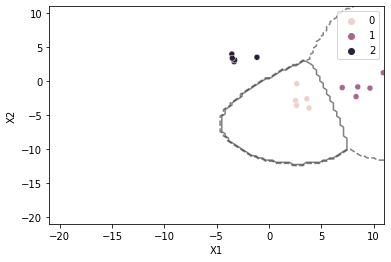

In [64]:
_ = sns.scatterplot(x = df["X1"], y = df["X2"], hue=y)

ax = plt.gca()
_ = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

# Scikit classes for SVM

In scikit we have three different classes that all of them implement SVM both for binary and multi-class classifications.

## SVC and NuSVC

These two classes are very similar and mathematically equivalent.  They 
differ in the **C** parameter since NuSVC is using **nu** instead.

## LinearSVC

Is a faster implementation that always relies on a linear kernel and this 
is why unlike **SVC** or **NuSVC** this class does not have a parameter
called kernel since it always will be predefined (linear).

Aside from always having a linear kernel, **LinearSVC** also uses a different
way to penalize the bias of the data (uses the squared hinge loss which the
other types of SVM use the first power of it).

The linear kernel and the bias estimation used are making the **LinearSVC** to 
be trained quicker (when compared to the other types of SVC) as the size of the
data is increasing.

## How multiclass classification is handler by scikit SVC

In its very basic theory SVM cannot solve multiclass classifiers "out of the box" as
it is limited to binary classifaction.  Still, using the algorithm that discussed
above (OneVsRestClassifier) we can extend the classical SVM algorithm to support
multiple classes.

<img src="./images/scikit-multiclassifier.png" style="height:200px"/>

The good thing with scikit is that all of its classifiers are supporting multiple
classes out of the box so we do not need to add a "manual" level where we will 
call yet another function to solve the **One vs Rest** case. 

You can read more about 
this here : https://scikit-learn.org/stable/modules/multiclass.html

